best w (numpy result): [ 3.00009091  0.50009091]
min error (numpy result): 1.25115363636 

error: 1.251163630006885 | alpha: 0.001100000000000 | learning rate: 1.100000000000000
error: 1.251157114193523 | alpha: 0.001210000000000 | learning rate: 1.100000000000000
error: 1.251154690908238 | alpha: 0.001331000000000 | learning rate: 1.100000000000000
error: 1.251153908308710 | alpha: 0.001464100000000 | learning rate: 1.100000000000000
error: 1.251153694191282 | alpha: 0.001610510000000 | learning rate: 1.100000000000000
error: 1.251153646099599 | alpha: 0.001771561000000 | learning rate: 1.100000000000000
error: 1.251153637591325 | alpha: 0.001948717100000 | learning rate: 1.100000000000000
error: 1.251153636470669 | alpha: 0.002143588810000 | learning rate: 1.100000000000000
error: 1.251153636369334 | alpha: 0.002357947691000 | learning rate: 1.100000000000000
error: 1.251153636363785 | alpha: 0.002593742460100 | learning rate: 1.100000000000000
error: 1.251153636363638 | alpha: 0.002

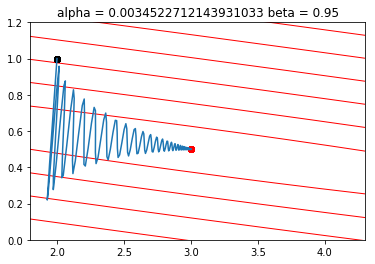

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import time
import numpy as np
from notes_utilities import pnorm_ball_line
from IPython import display

# initialize data
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
N = len(x)

# create the design matrix
A = np.vstack((np.ones(N), x)).T

# calculate values using numpy (np) 
w_best, E, rank, s = np.linalg.lstsq(A, y)
print("best w (numpy result):", w_best)

# calculate the min value using w_best
err = y-A.dot(w_best) 
E_min = np.sum(err**2) / N
print("min error (numpy result):", E_min, "\n")

def draw_pnorm():
    for i in range(0, 10):
        ln = pnorm_ball_line(mu=w_best, A = i*4*np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)
        plt.gca().add_line(ln) 

def inspect_momentum(alpha = 0.005, beta = 0.97):
    # set start position for w
    w0 = np.array([2., 1.])
    w = w0.copy()
    p = 0
    
    # set bounds and draw title
    plt.title('alpha = '+ str(alpha) + ' beta = ' +str(beta))
    plt.xlim((1.8,4.3))
    plt.ylim((0,1.2))
    
    # draw start position
    plt.plot(w[0],w[1],'ko')
    
    # draw best position
    plt.plot(w_best[0],w_best[1],'ro')
    
    EPOCHS = 1000
    # create a 2 * EPOCHS array
    W = np.zeros((2,EPOCHS))

    for epoch in range(EPOCHS):
        # Error
        err = y-A.dot(w)
        W[:,epoch] = w
        
        # Mean square error
        E = np.sum(err**2) / N

        # Gradient
        dE = -2. * A.T.dot(err) / N
        p = dE + beta * p

        #if epoch%10 == 1: 
            #print(epoch,':',E)
            #print(w)    
 
        # Perfom one descent step
        w = w - alpha * p 
    return W,w,E

# run solution
draw_pnorm()

alpha = 0.001
beta = 0.95
learning_rate = 1.1

i = 0
W, w, E_cur = inspect_momentum(alpha, beta)
E = E_cur + 1
while True:
    i+=1
    
    W,w, E_cur = inspect_momentum(alpha, beta)
    alpha = alpha * learning_rate
    
    #if error incrases, decrease the learning rate and, in the same way, decrease the alpha
    if E_cur > E:
        alpha = alpha / learning_rate
        learning_rate = 1 + (learning_rate - 1) / 2
    
        if(learning_rate == 1):
            break
    elif E_cur == E:
        break
    else:
        E = E_cur
        print("error: %8.15f | alpha: %8.15f | learning rate: %8.15f" % (E, alpha, learning_rate))

print()
print("best w (my method):", w)
print("min error (my method):", E_cur, "\n")
print("found solution using: %6d iterations." % (i))
        
# draw solution
plt.plot(W[0,:],W[1,:])
plt.show()